In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

niwaDf  = pd.read_csv('../data/niwa_cleaned/1971-2023-WeatherData.csv', parse_dates=['Date'])
niwaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           18834 non-null  datetime64[ns]
 1   Wdir (Deg)     18831 non-null  float64       
 2   WSpd (m/s)     18831 non-null  float64       
 3   GustDir (Deg)  18484 non-null  float64       
 4   GustSpd (m/s)  18635 non-null  float64       
 5   Tdry (C)       18831 non-null  float64       
 6   Twet (C)       18792 non-null  float64       
 7   RH (%)         18792 non-null  float64       
 8   Tmax (C)       18754 non-null  float64       
 9   Tmin (C)       18702 non-null  float64       
 10  Tgmin (C)      18526 non-null  float64       
 11  ET10 (C)       18593 non-null  float64       
 12  Pmsl (hPa)     18831 non-null  float64       
 13  Rad (MJ/m2)    18434 non-null  float64       
 14  Rain (mm)      18774 non-null  float64       
dtypes: datetime64[ns](1

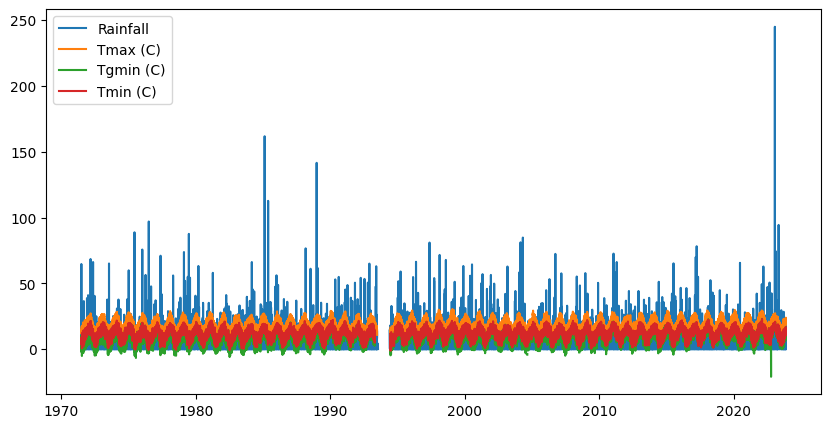

In [5]:
plt.figure(figsize=(10,5))
plt.plot(niwaDf['Date'], niwaDf['Rain (mm)'], label='Rainfall')
# plt.plot(niwaDf['Date'], niwaDf['Wdir (Deg)'], label='Wdir (Deg)')
# plt.plot(niwaDf['Date'], niwaDf['WSpd (m/s)'], label='WSpd (m/s)')
# plt.plot(niwaDf['Date'], niwaDf['GustDir (Deg)'], label='GustDir (Deg)')
# plt.plot(niwaDf['Date'], niwaDf['GustSpd (m/s)'], label='GustSpd (m/s)')
# plt.plot(niwaDf['Date'], niwaDf['Tdry (C)'], label='Tdry (C)')
# plt.plot(niwaDf['Date'], niwaDf['Twet (C)'], label='Twet (C)')
# plt.plot(niwaDf['Date'], niwaDf['RH (%)'], label='RH (%)')
plt.plot(niwaDf['Date'], niwaDf['Tmax (C)'], label='Tmax (C)')
plt.plot(niwaDf['Date'], niwaDf['Tgmin (C)'], label='Tgmin (C)')
plt.plot(niwaDf['Date'], niwaDf['Tmin (C)'], label='Tmin (C)')
# plt.plot(niwaDf['Date'], niwaDf['ET10 (C)'], label='EarthTemperatureAt10cm(C)')
# plt.plot(niwaDf['Date'], niwaDf['Pmsl (hPa)'], label='Pmsl (hPa)')
# plt.plot(niwaDf['Date'], niwaDf['Rad (MJ/m2)'], label='Rad (MJ/m2)')
plt.legend()


<BarContainer object of 18834 artists>

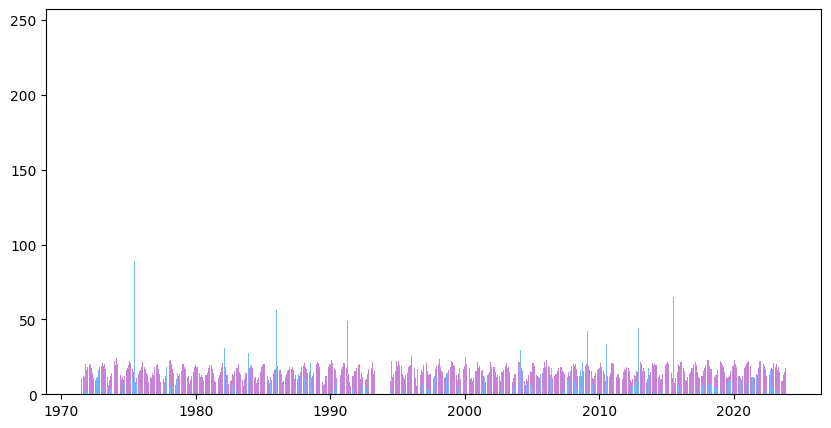

In [6]:
plt.figure(figsize=(10,5))
plt.bar(niwaDf['Date'], niwaDf['ET10 (C)'],  color="#C683D7")
plt.bar(niwaDf['Date'], niwaDf['Rain (mm)'],  color="#74b9ff")

In [7]:
statnz_noaa  = pd.read_csv('../data/statsNZ/noaa/statsNZ_noaa1966to2023.csv')
statnz_noaa['Date'] = pd.to_datetime(statnz_noaa['Date'], format='%d/%m/%Y')

statnz_noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21153 entries, 0 to 21152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21153 non-null  datetime64[ns]
 1   Rainfall(mm)  21149 non-null  float64       
 2   Tavg          21153 non-null  float64       
 3   Tmax          21105 non-null  float64       
 4   Tmin          21069 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 826.4 KB


In [8]:
statnz_noaa.head()

,Date,Rainfall(mm),Tavg,Tmax,Tmin
0,1966-01-01,0.0,18.0,22.2,13.9
1,1966-01-02,26.2,20.5,23.9,17.1
2,1966-01-03,0.0,20.3,23.5,17.1
3,1966-01-04,0.0,20.3,24.4,16.2
4,1966-01-05,1.3,20.6,23.4,17.8


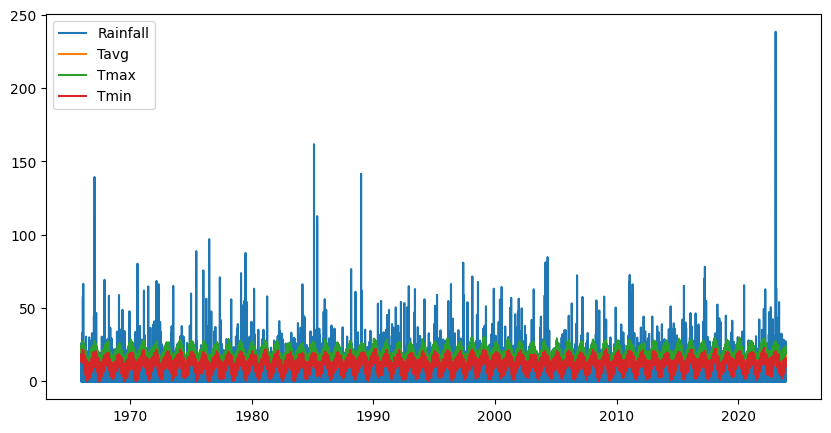

In [9]:
plt.figure(figsize=(10,5))
plt.plot(statnz_noaa['Date'], statnz_noaa['Rainfall(mm)'], label='Rainfall')
plt.plot(statnz_noaa['Date'], statnz_noaa['Tavg'], label='Tavg')
plt.plot(statnz_noaa['Date'], statnz_noaa['Tmax'], label='Tmax')
plt.plot(statnz_noaa['Date'], statnz_noaa['Tmin'], label='Tmin')
plt.legend()


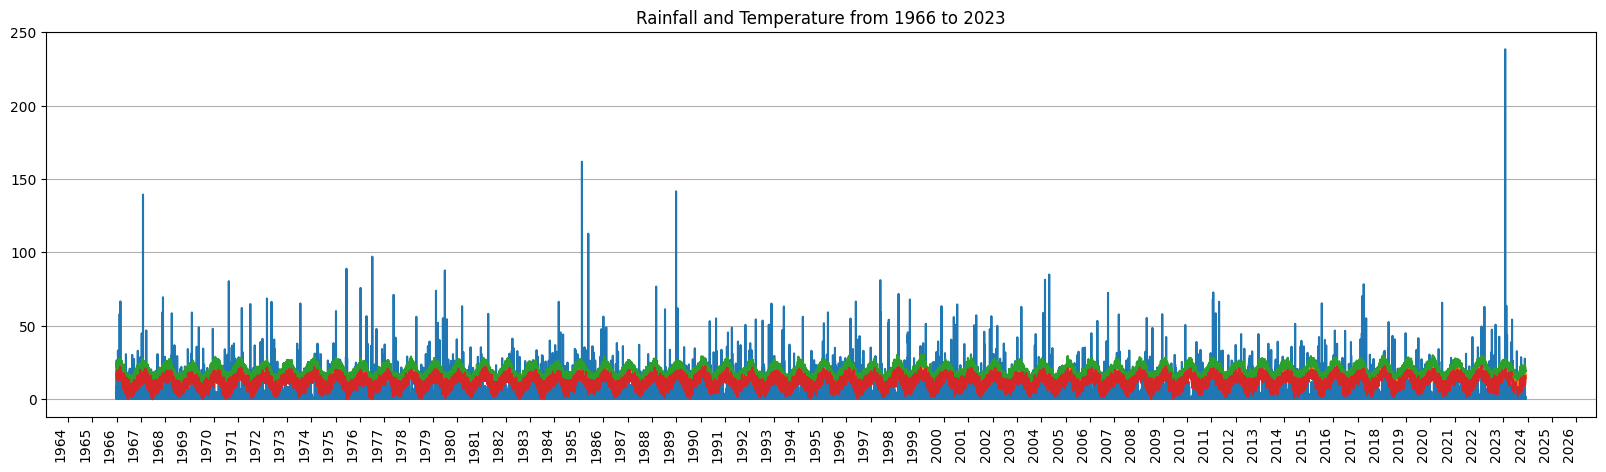

In [10]:
import matplotlib.pyplot as plt
from matplotlib import dates

statnz_noaa.index = pd.to_datetime(statnz_noaa['Date'], format='%d/%m/%Y')

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(statnz_noaa['Date'], statnz_noaa['Rainfall(mm)'], label='Rainfall')  
ax.plot(statnz_noaa['Date'], statnz_noaa['Tavg'], label='Tavg')  
ax.plot(statnz_noaa['Date'], statnz_noaa['Tmax'], label='Tmax')  
ax.plot(statnz_noaa['Date'], statnz_noaa['Tmin'], label='Tmin')  
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax.yaxis.grid(True)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Rainfall and Temperature from 1966 to 2023")
plt.show()

C:\Users\yingg\AppData\Local\Temp\ipykernel_5352\2105036019.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


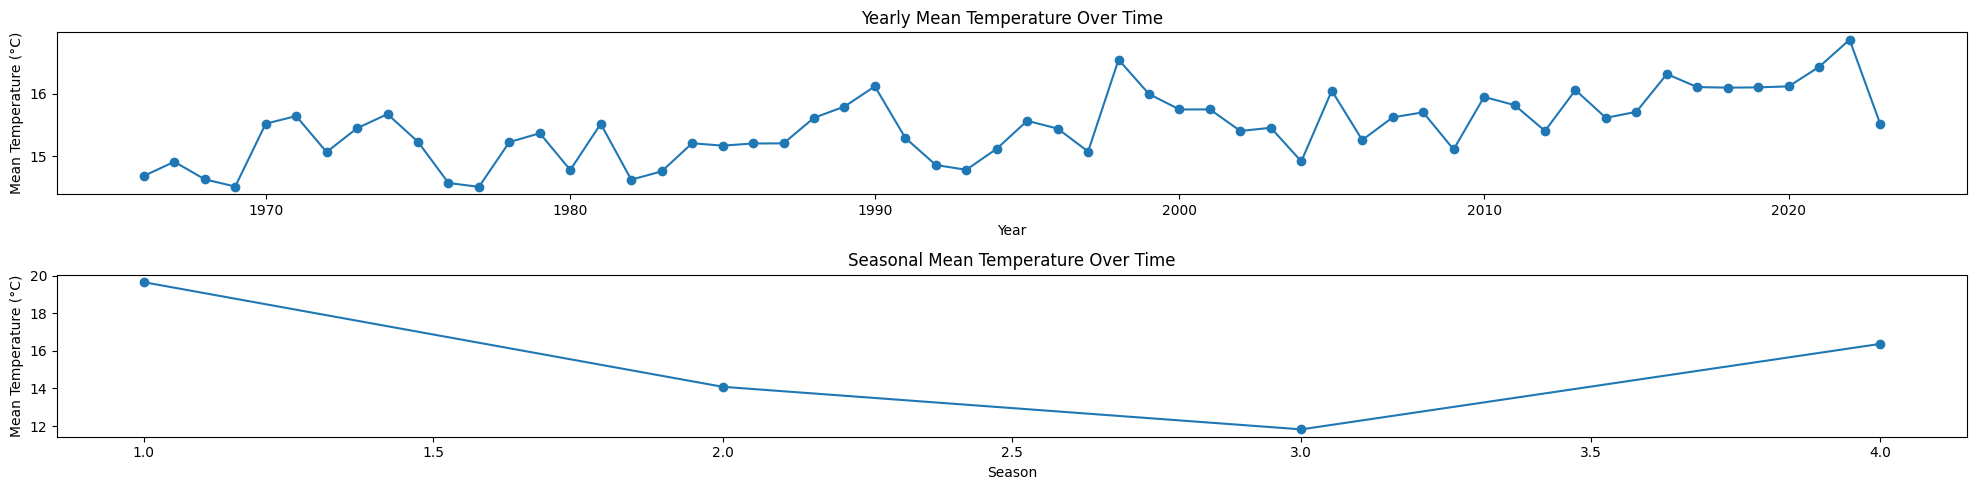

In [11]:
# Extract year and season information
statnz_noaa['Year'] = statnz_noaa['Date'].dt.year
statnz_noaa['Season'] = statnz_noaa['Date'].dt.quarter  # You can adjust this based on your definition of seasons

# Group by Year and Season, calculate mean temperature
mean_temp_yearly = statnz_noaa.groupby('Year')['Tavg'].mean()
mean_temp_seasonal = statnz_noaa.groupby('Season')['Tavg'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(20,5))
ax.yaxis.grid(True)

# Plot for yearly mean temperature
plt.subplot(2, 1, 1)
mean_temp_yearly.plot(marker='o')
plt.title('Yearly Mean Temperature Over Time')
plt.xlabel('Year')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))
plt.ylabel('Mean Temperature (°C)')

# Plot for seasonal mean temperature
plt.subplot(2, 1, 2)
mean_temp_seasonal.plot(marker='o')
plt.title('Seasonal Mean Temperature Over Time')
plt.xlabel('Season')
plt.ylabel('Mean Temperature (°C)')

plt.tight_layout()
plt.show()


In [12]:
# Extract year and season information
statnz_noaa['Year'] = statnz_noaa['Date'].dt.year
statnz_noaa['Season'] = statnz_noaa['Date'].dt.quarter  # You can adjust this based on your definition of seasons

# Group by Year and Season, calculate mean temperature
mean_temp_yearly = statnz_noaa.groupby('Year')['Tavg'].mean().reset_index()
mean_temp_seasonal = statnz_noaa.groupby('Season')['Tavg'].mean().reset_index()

# Print mean temperature table
print("Yearly Mean Temperature:")
print(mean_temp_yearly)

print("\nSeasonal Mean Temperature:")
mean_temp_seasonal[mean_temp_seasonal]

Yearly Mean Temperature:
    Year       Tavg
0   1966  14.685205
1   1967  14.913151
2   1968  14.631148
3   1969  14.515342
4   1970  15.523288
5   1971  15.646301
6   1972  15.068579
7   1973  15.451233
8   1974  15.677260
9   1975  15.232877
10  1976  14.572678
11  1977  14.510137
12  1978  15.228767
13  1979  15.370411
14  1980  14.780874
15  1981  15.521918
16  1982  14.625753
17  1983  14.758356
18  1984  15.209836
19  1985  15.171507
20  1986  15.206027
21  1987  15.207945
22  1988  15.618033
23  1989  15.798082
24  1990  16.122466
25  1991  15.295068
26  1992  14.860929
27  1993  14.784110
28  1994  15.120822
29  1995  15.569863
30  1996  15.444809
31  1997  15.076712
32  1998  16.551233
33  1999  15.998904
34  2000  15.751913
35  2001  15.752877
36  2002  15.406849
37  2003  15.458082
38  2004  14.919126
39  2005  16.052877
40  2006  15.261644
41  2007  15.625479
42  2008  15.706011
43  2009  15.110685
44  2010  15.952877
45  2011  15.822466
46  2012  15.407650
47  2013  16.06

ValueError: Boolean array expected for the condition, not int32

In [ ]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Extract year and season information using the custom function
statnz_noaa['Year'] = statnz_noaa['Date'].dt.year
statnz_noaa['Month'] = statnz_noaa['Date'].dt.month
statnz_noaa['Season'] = statnz_noaa['Month'].apply(get_season)

# Group by Year and Season, calculate mean temperature
mean_temp_yearly = statnz_noaa.groupby('Year')['Tavg'].mean().reset_index()
mean_temp_seasonal = statnz_noaa.groupby('Season')['Tavg'].mean().reset_index()

# Print mean temperature table
print("Yearly Mean Temperature:")
print(mean_temp_yearly)

print("\nSeasonal Mean Temperature:")
mean_temp_seasonal_df = pd.DataFrame(mean_temp_seasonal, columns=['Mean Temperature (°C)']).reset_index()
print(mean_temp_seasonal_df)

Yearly Mean Temperature:
    Year       Tavg
0   1966  14.685205
1   1967  14.913151
2   1968  14.631148
3   1969  14.515342
4   1970  15.523288
5   1971  15.646301
6   1972  15.068579
7   1973  15.451233
8   1974  15.677260
9   1975  15.232877
10  1976  14.572678
11  1977  14.510137
12  1978  15.228767
13  1979  15.370411
14  1980  14.780874
15  1981  15.521918
16  1982  14.625753
17  1983  14.758356
18  1984  15.209836
19  1985  15.171507
20  1986  15.206027
21  1987  15.207945
22  1988  15.618033
23  1989  15.798082
24  1990  16.122466
25  1991  15.295068
26  1992  14.860929
27  1993  14.784110
28  1994  15.120822
29  1995  15.569863
30  1996  15.444809
31  1997  15.076712
32  1998  16.551233
33  1999  15.998904
34  2000  15.751913
35  2001  15.752877
36  2002  15.406849
37  2003  15.458082
38  2004  14.919126
39  2005  16.052877
40  2006  15.261644
41  2007  15.625479
42  2008  15.706011
43  2009  15.110685
44  2010  15.952877
45  2011  15.822466
46  2012  15.407650
47  2013  16.06

In [ ]:
print(mean_temp_seasonal)


Season
1    19.649348
2    14.088071
3    11.823917
4    16.367896
Name: Tavg, dtype: float64


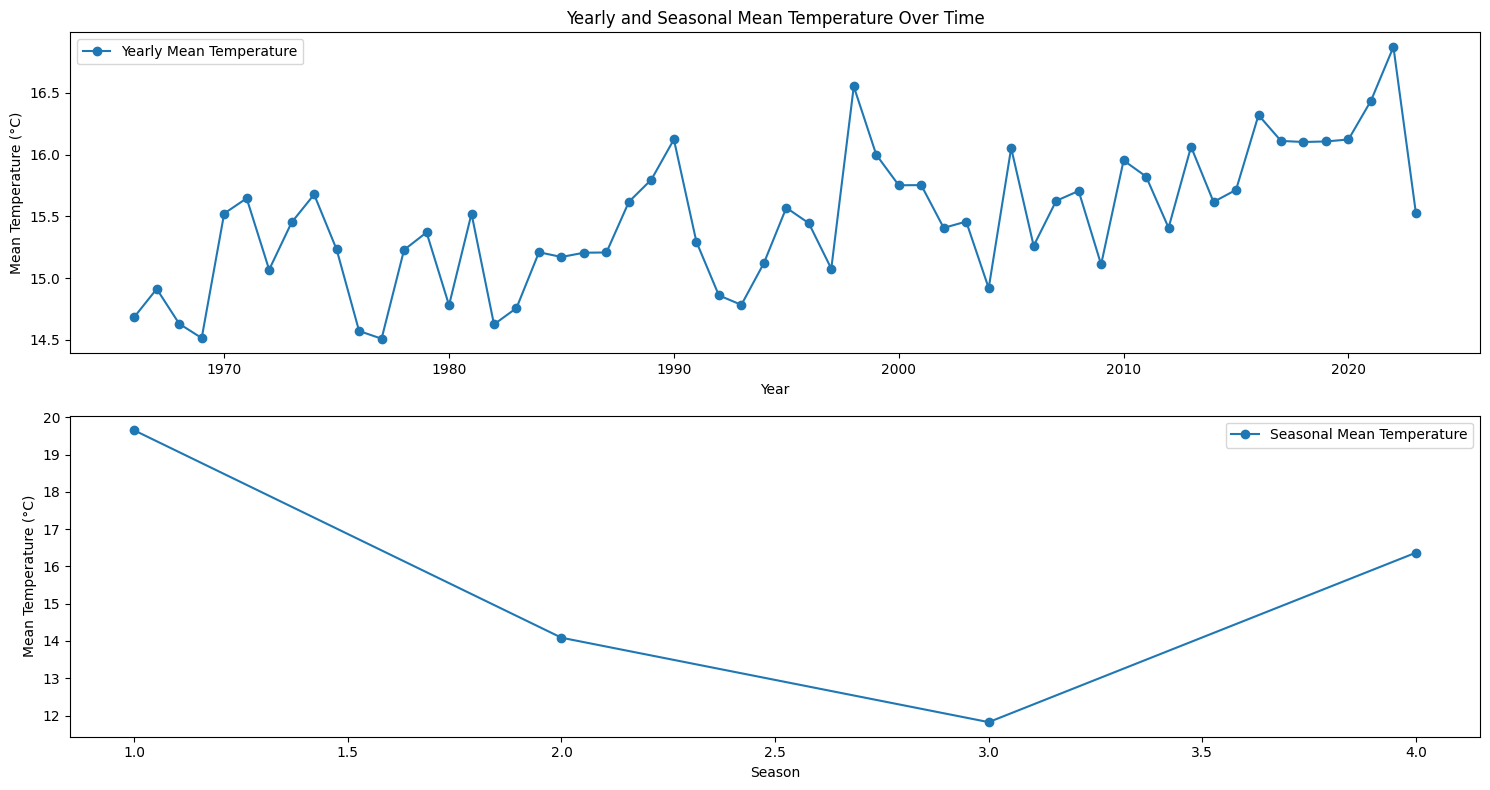

In [ ]:
# Extract year and season information
statnz_noaa['Year'] = statnz_noaa['Date'].dt.year
statnz_noaa['Season'] = statnz_noaa['Date'].dt.quarter  # You can adjust this based on your definition of seasons

# Group by Year and Season, calculate mean temperature
mean_temp_yearly = statnz_noaa.groupby('Year')['Tavg'].mean()
mean_temp_seasonal = statnz_noaa.groupby('Season')['Tavg'].mean()

# Plotting
plt.figure(figsize=(15, 8))

# Plot for yearly mean temperature
plt.subplot(2, 1, 1)
mean_temp_yearly.plot(marker='o', label='Yearly Mean Temperature')
plt.title('Yearly and Seasonal Mean Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.legend()

# Plot for seasonal mean temperature
plt.subplot(2, 1, 2)
mean_temp_seasonal.plot(marker='o', label='Seasonal Mean Temperature')
plt.xlabel('Season')
plt.ylabel('Mean Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()


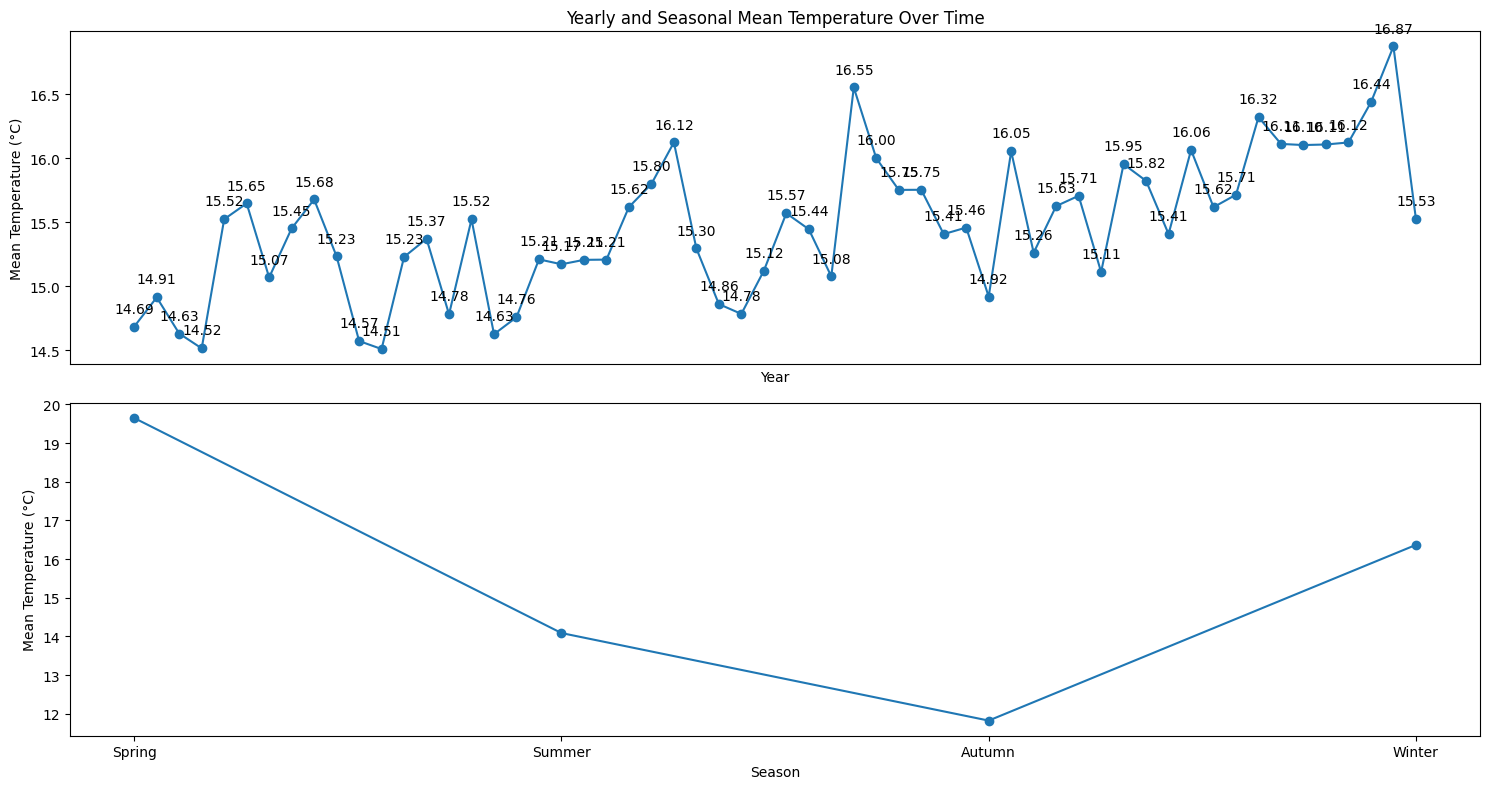

In [ ]:
statnz_noaa['Year'] = statnz_noaa['Date'].dt.year
statnz_noaa['Season'] = statnz_noaa['Date'].dt.quarter  # You can adjust this based on your definition of seasons

# Group by Year and Season, calculate mean temperature
mean_temp_yearly = statnz_noaa.groupby('Year')['Tavg'].mean()
mean_temp_seasonal = statnz_noaa.groupby('Season')['Tavg'].mean()

# Plotting
plt.figure(figsize=(15, 8))

# Plot for yearly mean temperature
plt.subplot(2, 1, 1)
plt.plot(mean_temp_yearly.index, mean_temp_yearly, marker='o', label='Yearly Mean Temperature')
plt.title('Yearly and Seasonal Mean Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')

# Annotate data points with the yearly mean temperature value
for year, temp in zip(mean_temp_yearly.index, mean_temp_yearly):
    plt.annotate(f'{temp:.2f}', (year, temp), textcoords="offset points", xytext=(0, 10), ha='center')

# Set the x-axis to display every year
plt.gca().xaxis.set_major_locator(dates.YearLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%Y'))

# Plot for seasonal mean temperature
plt.subplot(2, 1, 2)
mean_temp_seasonal.plot(marker='o', label='Seasonal Mean Temperature')
plt.xticks([1, 2, 3, 4], ['Spring', 'Summer', 'Autumn', 'Winter'])
plt.xlabel('Season')
plt.ylabel('Mean Temperature (°C)')

plt.tight_layout()
plt.show()

In [14]:
print(mean_temp_yearly.columns)


Index(['Year', 'Tavg'], dtype='object')


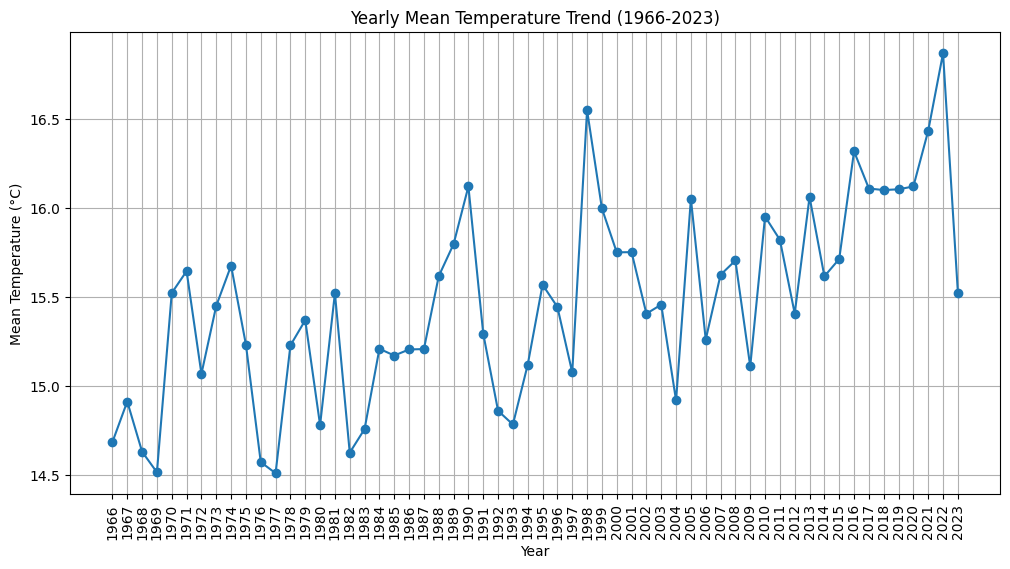

In [22]:
import seaborn as sns

# 1. Overall Trend
plt.figure(figsize=(12, 6))
plt.plot(mean_temp_yearly['Year'], mean_temp_yearly['Tavg'], marker='o')
plt.title('Yearly Mean Temperature Trend (1966-2023)')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.grid(True)
plt.xticks(mean_temp_yearly['Year'])  # Set x-axis ticks to every year
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


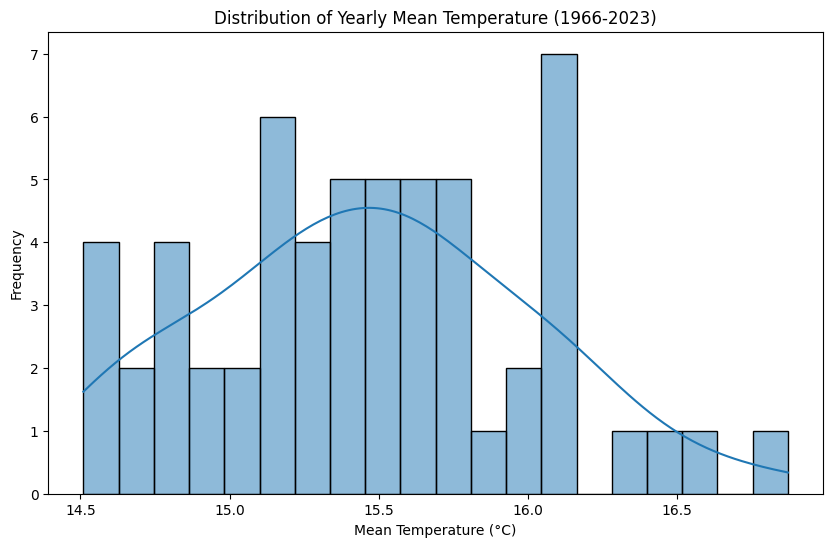

In [23]:
# 2. Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(mean_temp_yearly['Tavg'], bins=20, kde=True)
plt.title('Distribution of Yearly Mean Temperature (1966-2023)')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Frequency')
plt.show()